# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [5]:
data = pd.read_csv("reduced_dataset/dataset_16angles.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [6]:
data.shape

(8448, 11)

Input features and output variable selection

In [16]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data["CPL"].values*1000 #mev multiplication

Splitting of the data into train set and test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [19]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [20]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [21]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               2560      
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-tr

Number of epochs used for training

In [23]:
num_epochs = 500

Neural Network training

In [24]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
191/191 [==============================] - 1s 3ms/step - loss: 1.2133 - val_loss: 1.2489
Epoch 2/500
191/191 [==============================] - 1s 3ms/step - loss: 0.8486 - val_loss: 1.0359
Epoch 3/500
191/191 [==============================] - 1s 3ms/step - loss: 0.7408 - val_loss: 0.8902
Epoch 4/500
191/191 [==============================] - 1s 3ms/step - loss: 0.6988 - val_loss: 1.0236
Epoch 5/500
191/191 [==============================] - 1s 3ms/step - loss: 0.7197 - val_loss: 0.7361
Epoch 6/500
191/191 [==============================] - 1s 3ms/step - loss: 0.5984 - val_loss: 0.8242
Epoch 7/500
191/191 [==============================] - 1s 3ms/step - loss: 0.5501 - val_loss: 0.6810
Epoch 8/500
191/191 [==============================] - 1s 3ms/step - loss: 0.4884 - val_loss: 0.7885
Epoch 9/500
191/191 [==============================] - 1s 3ms/step - loss: 0.4865 - val_loss: 0.5616
Epoch 10/500
191/191 [==============================] - 1s 3ms/step - loss: 0.4479 - val_lo

191/191 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 82/500
191/191 [==============================] - 0s 3ms/step - loss: 0.2980 - val_loss: 0.4891
Epoch 83/500
191/191 [==============================] - 0s 3ms/step - loss: 0.1350 - val_loss: 0.0167
Epoch 84/500
191/191 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.0123
Epoch 85/500
191/191 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.0069
Epoch 86/500
191/191 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.0047
Epoch 87/500
191/191 [==============================] - 0s 3ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 88/500
191/191 [==============================] - 0s 3ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 89/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0056 - val_loss: 0.0089
Epoch 90/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0078 - val_loss: 

Epoch 161/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0069 - val_loss: 0.1048
Epoch 162/500
191/191 [==============================] - 1s 3ms/step - loss: 0.4005 - val_loss: 0.2236
Epoch 163/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0398 - val_loss: 0.0336
Epoch 164/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0136 - val_loss: 0.0102
Epoch 165/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0071 - val_loss: 0.0124
Epoch 166/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0059 - val_loss: 0.0062
Epoch 167/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0058 - val_loss: 0.0070
Epoch 168/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 169/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 170/500
191/191 [==============================] - 1s 3ms/step - lo

191/191 [==============================] - 1s 3ms/step - loss: 0.0149 - val_loss: 0.0110
Epoch 241/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0091 - val_loss: 0.0060
Epoch 242/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0057 - val_loss: 0.0055
Epoch 243/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 244/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 245/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 246/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 247/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 248/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0031 - val_loss: 0.0035
Epoch 249/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0040 - v

191/191 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 320/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 321/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 322/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 323/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 324/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 325/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0026 - val_loss: 0.0061
Epoch 326/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 327/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0036 - val_loss: 0.0047
Epoch 328/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0047 - v

191/191 [==============================] - 1s 4ms/step - loss: 0.2555 - val_loss: 0.3096
Epoch 399/500
191/191 [==============================] - 1s 4ms/step - loss: 0.1642 - val_loss: 0.1721
Epoch 400/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0780 - val_loss: 0.0337
Epoch 401/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0169 - val_loss: 0.0108
Epoch 402/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0090 - val_loss: 0.0093
Epoch 403/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0072 - val_loss: 0.0076
Epoch 404/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0069 - val_loss: 0.0098
Epoch 405/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0100
Epoch 406/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0056 - val_loss: 0.0072
Epoch 407/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0057 - v

191/191 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 478/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 479/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0077 - val_loss: 0.0042
Epoch 480/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 481/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0027 - val_loss: 0.0043
Epoch 482/500
191/191 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 483/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0456 - val_loss: 0.0586
Epoch 484/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0891 - val_loss: 0.0135
Epoch 485/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0047 - val_loss: 0.0027
Epoch 486/500
191/191 [==============================] - 1s 4ms/step - loss: 0.0022 - v

# Model Evaluation

In [25]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

53/53 [==============================] - 0s 2ms/step - loss: 0.0027


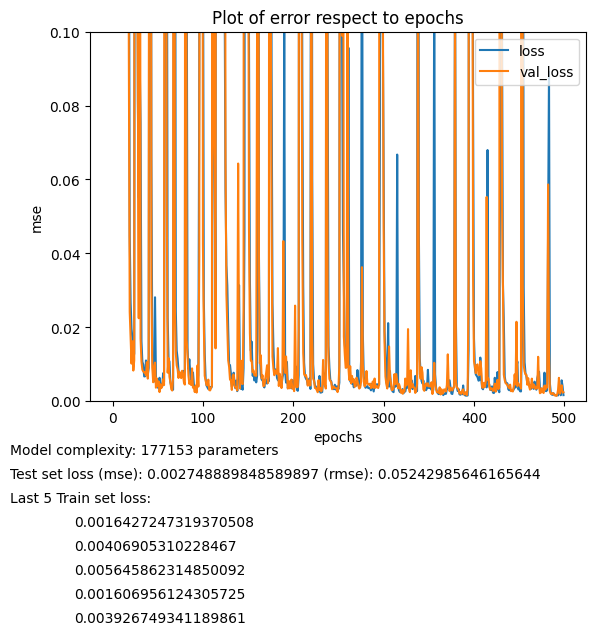

In [26]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [27]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [28]:
#model.predict(emp_test)

array([[-57.494797]], dtype=float32)

# Scatter plot

In [29]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [30]:
pred = predictions(X_test)

In [31]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.002748889072156346

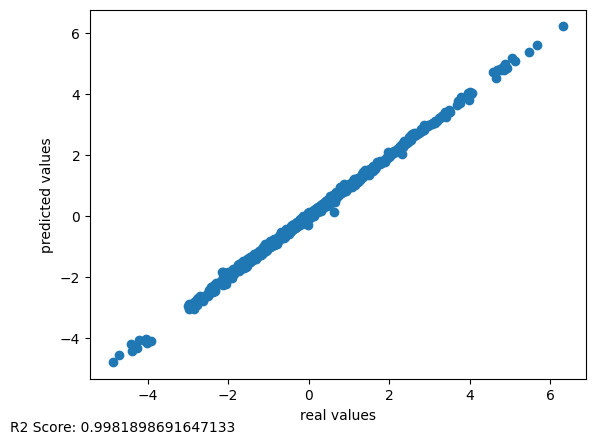

In [32]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [26]:
model.save('CPL_meV.h5')